In [20]:
import pandas as pd
import numpy as np
import ipython_bell

In [21]:
data = pd.read_csv('cleaned_data.csv', index_col=0)

In [22]:
data.head()

,song,year,artist,genre,lyrics,song_length,language
index,,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",1961.0,en
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",1270.0,en
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,827.0,en
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2344.0,en
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",1540.0,en


In [23]:
lyrics_documents = list(data['lyrics'].dropna())

In [24]:
len(lyrics_documents)

216631

# Topic Analysis - Train Model

In [25]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [26]:
tokenizer = RegexpTokenizer(r'\w+')

In [27]:
en_stop = get_stop_words('en')

In [28]:
p_stemmer = PorterStemmer()

In [29]:
texts = []

In [30]:
%%bell
for i in lyrics_documents:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

In [31]:
%%bell
dictionary = corpora.Dictionary(texts)

In [32]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [33]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [34]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(0, '0.019*"s" + 0.016*"t" + 0.016*"like" + 0.016*"m"'), (1, '0.027*"s" + 0.026*"t" + 0.016*"love" + 0.015*"can"')]


In [35]:
print(ldamodel.print_topics(num_topics=2, num_words=30))

[(0, '0.019*"s" + 0.016*"t" + 0.016*"like" + 0.016*"m" + 0.014*"get" + 0.012*"got" + 0.007*"nigga" + 0.007*"ain" + 0.006*"don" + 0.006*"know" + 0.006*"fuck" + 0.006*"yeah" + 0.006*"ya" + 0.006*"man" + 0.005*"just" + 0.005*"girl" + 0.005*"go" + 0.005*"now" + 0.005*"shit" + 0.005*"caus" + 0.005*"can" + 0.005*"back" + 0.004*"make" + 0.004*"la" + 0.004*"em" + 0.004*"come" + 0.004*"money" + 0.004*"let" + 0.004*"see" + 0.003*"bitch"'), (1, '0.027*"s" + 0.026*"t" + 0.016*"love" + 0.015*"can" + 0.014*"m" + 0.012*"know" + 0.012*"don" + 0.012*"re" + 0.011*"just" + 0.010*"ll" + 0.009*"oh" + 0.009*"time" + 0.008*"now" + 0.008*"go" + 0.008*"one" + 0.008*"ve" + 0.007*"never" + 0.007*"like" + 0.007*"come" + 0.007*"will" + 0.007*"want" + 0.007*"see" + 0.007*"feel" + 0.006*"way" + 0.006*"let" + 0.006*"say" + 0.006*"take" + 0.006*"make" + 0.005*"day" + 0.005*"away"')]


In [36]:
ldamodel.save('lda.model')

In [43]:
print(ldamodel[corpus[6]])

[(1, 0.99516976)]


# Topic Analysis - Calculate Probabilities

In [60]:
analysis_data = data.dropna(subset=['lyrics'])

In [45]:
print(len(analysis_data['lyrics']))
print(len(texts))

216631
216631


In [55]:
topic_1 = []
topic_2 = []

In [56]:
for index, i in enumerate(corpus):
    probability = ldamodel[i]
    for terms in probability:
        if terms[0] == 0:
            topic_1.append(terms[1])
        else:
            topic_2.append(terms[1])
            
        if len(probability) == 1:
            if terms[0] == 0:
                topic_2.append(0)
            else:
                topic_1.append(0)

In [58]:
len(topic_1)
len(topic_2)

216631

In [61]:
analysis_data['topic_1'] = topic_1
analysis_data['topic_2'] = topic_2

In [62]:
analysis_data.head()

,song,year,artist,genre,lyrics,song_length,language,topic_1,topic_2
index,,,,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",1961.0,en,0.252225,0.747775
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",1270.0,en,0.010709,0.989291
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,827.0,en,0.000000,0.993693
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2344.0,en,0.370812,0.629188
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",1540.0,en,0.552502,0.447498


In [63]:
list(analysis_data)

['song',
 'year',
 'artist',
 'genre',
 'lyrics',
 'song_length',
 'language',
 'topic_1',
 'topic_2']

In [64]:
analysis_data = analysis_data.melt(id_vars=['song', 'year', 'artist', 'genre', 'lyrics', 'song_length','language'], var_name='probability')

In [66]:
analysis_data.tail()

,song,year,artist,genre,lyrics,song_length,language,probability,value
433257,who-am-i-drinking-tonight,2012,edens-edge,Country,"I gotta say\nBoy, after only just a couple of ...",1630.0,en,topic_2,0.267442
433258,liar,2012,edens-edge,Country,I helped you find her diamond ring\nYou made m...,1014.0,en,topic_2,0.977958
433259,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth\nLooks ...,1183.0,en,topic_2,0.848520
433260,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth\nAnd I'm meas...,852.0,en,topic_2,0.978934
433261,amen,2012,edens-edge,Country,I heard from a friend of a friend of a friend ...,1557.0,en,topic_2,0.431276


# Visualize Probability Data by Genre

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

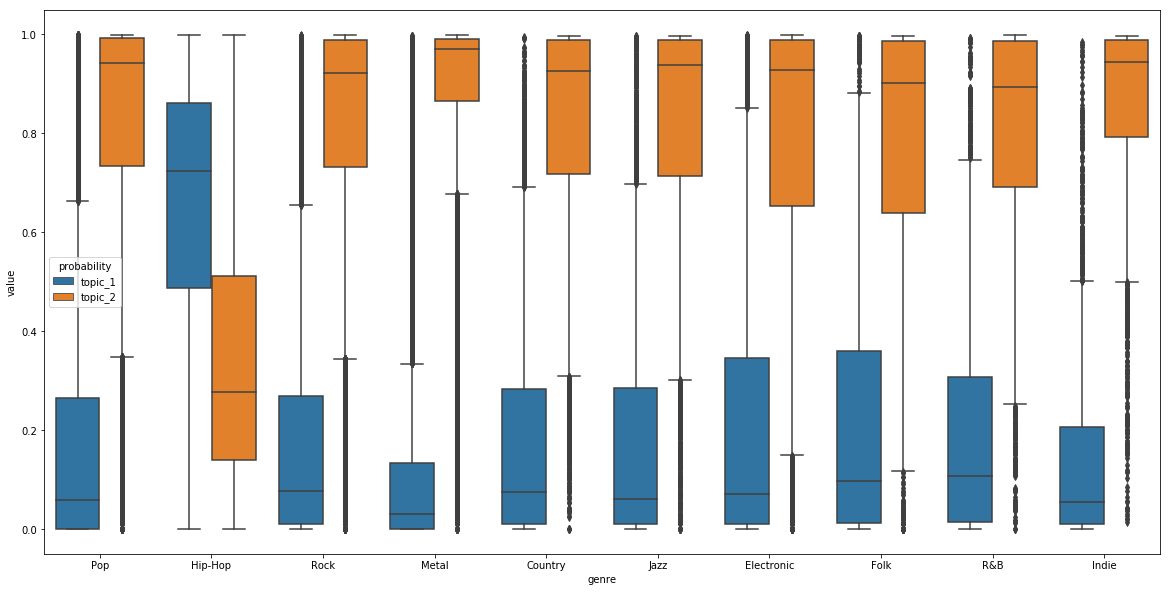

In [73]:
plt.figure(figsize=(20,10))
sns.boxplot(x='genre', y='value', hue='probability', data=analysis_data)